In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dateutil.relativedelta import relativedelta
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import statsmodels
import datetime

In [3]:
import sys
import os.path
# Local Modules
from helpers.load import load_interventions, load_aggregated, load_topics, load_pca
from helpers.vars import codes, helper_langs
from helpers.plot import set_size, plot_diffs_in_diffs_interventions, plot_diffs_in_diffs_all
from helpers.diffs_n_diffs import get_diffs_in_diffs_result, get_df_pageviews, get_df_pca
from helpers.diffs_n_diffs import interventions_df_pca, interventions_df_pageviews

                

In [4]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# fontpath = os.path.expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
# prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'ytick.labelsize': 12,
#     'font.family': 'Linux Libertine Display',
    'text.usetex': True
}

mpl.rcParams.update(params)

## Loads data & helpers 

In [5]:
time_int = 35
interventions = load_interventions("../data/interventions.csv")
topics_df, topics = load_topics('../data/topics_linked.csv.xz')
agg = load_aggregated("../data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
dfs_pca_shift = load_pca(codes_order, pca_folder="../data/pca/")
np.random.seed(17835415)

## Pageviews

In [6]:
mobility = lambda x, delta: interventions[x.replace(".m", "")]["Mobility"] + delta
normalcy = lambda x, delta: interventions[x.replace(".m", "")]["Normalcy"] + delta

df_pageviews, df_pageviews_results = get_df_pageviews(agg, codes,
                                                      mobility, relativedelta(days=0),
                                                      mobility, relativedelta(days=0),
                                                      time_int)

df_pageviews_norm, df_pageviews_norm_results = get_df_pageviews(agg, codes,
                                                                mobility, relativedelta(days=time_int), 
                                                                normalcy, relativedelta(days=0), 
                                                                time_int)

df_pageviews_norm2, df_pageviews_norm_results2 = get_df_pageviews(agg, codes,
                                                            mobility, relativedelta(days=0),
                                                            normalcy, relativedelta(days=0),
                                                            time_int)

[Timestamp('2020-02-10 00:00:00'), Timestamp('2020-03-16 00:00:00')]
[Timestamp('2020-03-16 00:00:00'), Timestamp('2020-04-20 00:00:00')]
R2: 0.9970142626921447
[Timestamp('2020-03-16 00:00:00'), Timestamp('2020-04-20 00:00:00')]
[Timestamp('2020-05-21 00:00:00'), Timestamp('2020-06-25 00:00:00')]
R2: 0.9965137385179754
[Timestamp('2020-02-10 00:00:00'), Timestamp('2020-03-16 00:00:00')]
[Timestamp('2020-05-21 00:00:00'), Timestamp('2020-06-25 00:00:00')]
R2: 0.9973573188009914


In [7]:
df_pageviews_norm_results

,lang,low,high,val,pval,std
0,de,-0.236243,-0.108960,-0.172601,True,0.031821
1,fr,-0.292948,-0.191481,-0.242215,True,0.025367
2,it,-0.479840,-0.384339,-0.432089,True,0.023875
3,sr,-0.215927,-0.022552,-0.119240,True,0.048344
4,no,-0.341618,-0.145129,-0.243374,True,0.049122
5,ko,-0.156269,0.003777,-0.076246,False,0.040012
6,da,-0.236643,-0.079979,-0.158311,True,0.039166
7,sv,-0.101103,0.033922,-0.033591,False,0.033756
8,ja,-0.138415,-0.029690,-0.084052,True,0.027181
9,nl,-0.207167,-0.077200,-0.142184,True,0.032492


In [8]:
df_pageviews_norm_results2

,lang,low,high,val,pval,std
0,de,-0.059473,0.053040,-0.003216,False,0.028128
1,fr,-0.066686,0.015621,-0.025532,False,0.020577
2,it,-0.086260,0.000762,-0.042749,False,0.021756
3,sr,0.166257,0.344943,0.255600,True,0.044672
4,no,-0.196329,-0.029499,-0.112914,True,0.041707
5,ko,-0.051621,0.098001,0.023190,False,0.037406
6,da,-0.169917,-0.025643,-0.097780,True,0.036069
7,sv,-0.007628,0.099371,0.045872,False,0.026750
8,ja,-0.015257,0.062963,0.023853,False,0.019555
9,nl,-0.037994,0.073368,0.017687,False,0.027840


## Attention Shift

In [9]:
df_pca, df_pca_results = get_df_pca(dfs_pca_shift, codes, interventions,
    mobility, relativedelta(days=0),
    mobility, relativedelta(days=0),
    time_int)

df_pca_norm, df_pca_norm_results = get_df_pca(dfs_pca_shift, codes, interventions,
    mobility, relativedelta(days=time_int), 
    normalcy, relativedelta(days=0), 
    time_int)


df_pca_norm2, df_pca_norm_results2 = get_df_pca(dfs_pca_shift, codes, interventions,
    mobility, relativedelta(days=0),
    normalcy, relativedelta(days=0),
    time_int)

de 2020-03-16 00:00:00
fr 2020-03-16 00:00:00
it 2020-03-11 00:00:00
sr 2020-03-16 00:00:00
no 2020-03-11 00:00:00
ko 2020-02-25 00:00:00
da 2020-03-11 00:00:00
sv 2020-03-11 00:00:00
ja 2020-03-31 00:00:00
nl 2020-03-16 00:00:00
fi 2020-03-16 00:00:00
en 2020-03-16 00:00:00
R2: 0.9387647308366688
de 2020-03-16 00:00:00
fr 2020-03-16 00:00:00
it 2020-03-11 00:00:00
sr 2020-03-16 00:00:00
no 2020-03-11 00:00:00
ko 2020-02-25 00:00:00
da 2020-03-11 00:00:00
sv 2020-03-11 00:00:00
ja 2020-03-31 00:00:00
nl 2020-03-16 00:00:00
fi 2020-03-16 00:00:00
en 2020-03-16 00:00:00
R2: 0.932016419784808
de 2020-03-16 00:00:00
fr 2020-03-16 00:00:00
it 2020-03-11 00:00:00
sr 2020-03-16 00:00:00
no 2020-03-11 00:00:00
ko 2020-02-25 00:00:00
da 2020-03-11 00:00:00
sv 2020-03-11 00:00:00
ja 2020-03-31 00:00:00
nl 2020-03-16 00:00:00
fi 2020-03-16 00:00:00
en 2020-03-16 00:00:00
R2: 0.9448196600426549


## Impact of different interventions

In [10]:
df_interv_pca_results = interventions_df_pca(dfs_pca_shift, codes, interventions, time_int)
df_interv_pv_results = interventions_df_pageviews(agg, codes, interventions, time_int)

1st case
1st death
School closure
Public events banned
Lockdown
Mobility
Normalcy


In [11]:
df_interv_pv_results

,intervention,low,high,val,pval,res
0,1st case,-0.002571,0.037933,0.017681,8.700353e-02,0.994670
1,1st death,0.075819,0.120896,0.098357,2.722200e-17,0.993269
2,School closure,0.136986,0.181187,0.159086,1.279173e-42,0.993555
3,Public events banned,0.169071,0.215947,0.192509,1.216713e-53,0.993812
4,Lockdown,0.238520,0.300169,0.269344,1.262094e-56,0.994942
5,Mobility,0.155552,0.196658,0.176105,1.223335e-58,0.996090
6,Normalcy,-0.138418,-0.090262,-0.114340,3.854482e-20,0.994804


## Plots results

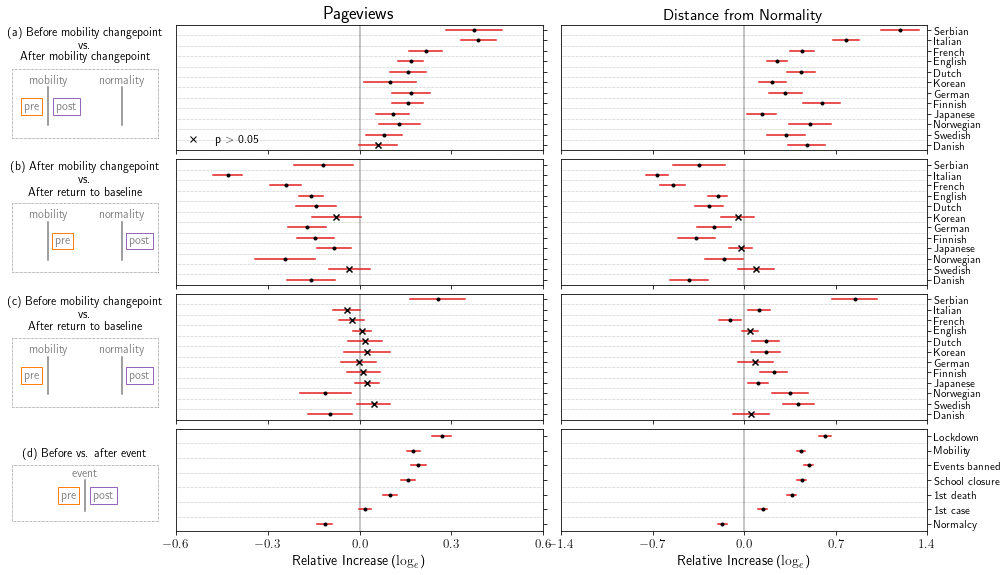

In [12]:
# df_interv_pca_results
fig, axes = plt.subplots(4, 2, figsize=(14, 8), sharex="col",
                       gridspec_kw={"hspace": 0.075, "wspace": 0.05, "top": 0.9, "bottom":0.15,
                                   "height_ratios": [11/42, 11/42, 11/42, 9/42]})

intervention_order = ["Normalcy", '1st case', '1st death', 'School closure', 'Public events banned',
                      'Mobility', 'Lockdown']

axes = [axes[0, 1], axes[1 , 1], axes[2, 1], axes[3, 1], axes[0, 0], axes[1 ,0], axes[2, 0], axes[3, 0]]


# plot_diffs_in_diffs(df_pageviews_results, codes_order, axes[0])

plot_diffs_in_diffs_all(df_pca_results, codes_order, axes[0], helper_langs,mobile=False)
plot_diffs_in_diffs_all(df_pca_norm_results, codes_order, axes[1], helper_langs, mobile=False)
plot_diffs_in_diffs_all(df_pca_norm_results2, codes_order, axes[2], helper_langs, mobile=False)
plot_diffs_in_diffs_interventions(df_interv_pca_results, intervention_order, axes[3])

plot_diffs_in_diffs_all(df_pageviews_results, codes_order, axes[4], helper_langs, mobile=False)
plot_diffs_in_diffs_all(df_pageviews_norm_results, codes_order, axes[5], helper_langs, mobile=False)
plot_diffs_in_diffs_all(df_pageviews_norm_results2, codes_order, axes[6], helper_langs, mobile=False)
plot_diffs_in_diffs_interventions(df_interv_pv_results, intervention_order, axes[7])


for ax in axes[4:]:
    ax.axvline(0, zorder=0, color="black", ls="-", alpha=0.3)

    ax.set_xlim([-0.6, 0.6])
    ax.set_xticks([-0.6, -0.3, 0, 0.3, 0.6])
    ax.set_yticklabels([])
    ax.yaxis.tick_right()


for ax in axes[:4]:
    ax.axvline(0, zorder=0, color="black", ls="-", alpha=0.3)
    ax.set_xlim([-1.4, 1.4])
    ax.set_xticks([-1.4, -0.7, 0, 0.7, 1.4])
    ax.yaxis.tick_right()
    ax.tick_params(axis='y', which='both', labelsize=11)

axes[3].set_xlabel("Relative Increase ($\log_e$)", size=14)
axes[7].set_xlabel("Relative Increase ($\log_e$)", size=14)


axes[4].set_title('Pageviews', size=18)

axes[0].set_title('Distance from Normality', size=16)
# axes[2].set_title('(c) Pageview by Event', size=14)
# axes[3].set_title('(d) Attention Shift by Event', size=14)

import matplotlib
lines = [
    Line2D([0], [0], color="black", lw=0, marker="x"),

]

axes[4].legend(
    handles=lines,
    labels=["p $>$ 0.05"],
#     loc='upper center', bbox_to_anchor=(1, 1.35),
    fancybox=True, shadow=False,
    frameon=False, edgecolor=None, fontsize=12,
    borderaxespad=0
)
vals = [
    (-0.395, -0.30),
    (-0.31, -0.10),
    (-0.395, -0.10),
]

titles = [
    '(a) Before mobility changepoint\nvs.\n After mobility changepoint',
    '(b) After mobility changepoint\nvs.\n After return to baseline',
    '(c) Before mobility changepoint \nvs.\n After return to baseline'
]

for val, tit, ax in zip(vals, titles, axes[4:7]):
    ax.plot([-0.15, -0.15], [.2, .5], clip_on=False, transform=ax.transAxes, color="gray")
    ax.text(-0.15, 0.515, "normality",  transform=ax.transAxes, color="gray",  ha="center", va="bottom")
    ax.plot([-0.35, -0.35], [.2, .5], clip_on=False, transform=ax.transAxes, color="gray")
    ax.text(-0.35, 0.515, "mobility",  transform=ax.transAxes, color="gray",  ha="center", va="bottom")

    ax.text(val[0], 0.35, "pre",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
                     bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:orange','pad':3})
    ax.text(val[1], 0.35, "post",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
           bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:purple','pad':3})
    
    ax.plot([-0.05, -0.05, -0.45, -0.45, -0.05], [.1, .65, .65, .1, .1], 
            clip_on=False, transform=ax.transAxes, color="black", 
            lw=0.5, ls=":")
    ax.text(-0.25, 0.7, tit, transform=ax.transAxes, size=12, ha="center", va="bottom")

ax = axes[7]

ax.text(-.295, 0.35, "pre ",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
                 bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:orange','pad':3})
ax.text(-.20, 0.35, "post",  transform=ax.transAxes, color="gray",  ha="center", va="center", zorder=10,
       bbox={'facecolor':'white','alpha':1,'edgecolor':'tab:purple','pad':3})
ax.text(-0.25, 0.515, "event",  transform=ax.transAxes, color="gray",  ha="center", va="bottom")
ax.plot([-0.25, -0.25], [.2, .5], clip_on=False, transform=ax.transAxes, color="gray")
ax.plot([-0.05, -0.05, -0.45, -0.45, -0.05], [.1, .65, .65, .1, .1], 
        clip_on=False, transform=ax.transAxes, color="black", 
        lw=0.5, ls=":")

ax.text(-0.25, 0.7, '(d) Before vs. after event', transform=ax.transAxes, size=12, ha="center", va="bottom")

set_size(fig, (14, 8))
fig.savefig("../images/diffs_in_diffs_all.pdf", bbox_inches="tight")

--- 